In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [9]:
df = pd.read_csv("/Users/I566184/bachelorarbeit_coding/mesogeos/csv/Physical_Interpretability.csv", sep=";", index_col=0)
df = df.loc[:, ~df.columns.str.contains("^Unnamed")]

In [10]:
physical_knowledge = {
    "t2m": "+", "d2m": "-", "lc_agriculture": "+", "lc_forest": "+", "lc_grassland": "+",
    "lc_settlement": "-", "lc_shrubland": "+", "lc_sparse_vegetation": "+", "lc_water_bodies": "-",
    "lc_wetland": "-", "lst_day": "+", "lst_night": "+", "rh": "-", "roads_distance": "+",
    "smi": "-", "ssrd": "+", "tp": "-", "wind_speed": "+"
}

In [16]:
df_plot = df.copy().astype(str).replace({"1.0": "Y", "0.0": "N", "1": "Y", "0": "N"})
df_plot = df_plot.T
df_plot.loc["Physical-knowledge"] = [physical_knowledge.get(var, "") for var in df_plot.columns]

In [17]:
def get_color(val):
    return {
        "Y": "#f4a7b9",  # rosa
        "N": "#9ba4b5",  # grau
        "+": "#c1121f",  # rot
        "-": "#669bbc"   # blau
    }.get(val, "#ffffff")  # weiß fallback

colors = np.vectorize(get_color)(df_plot.values)

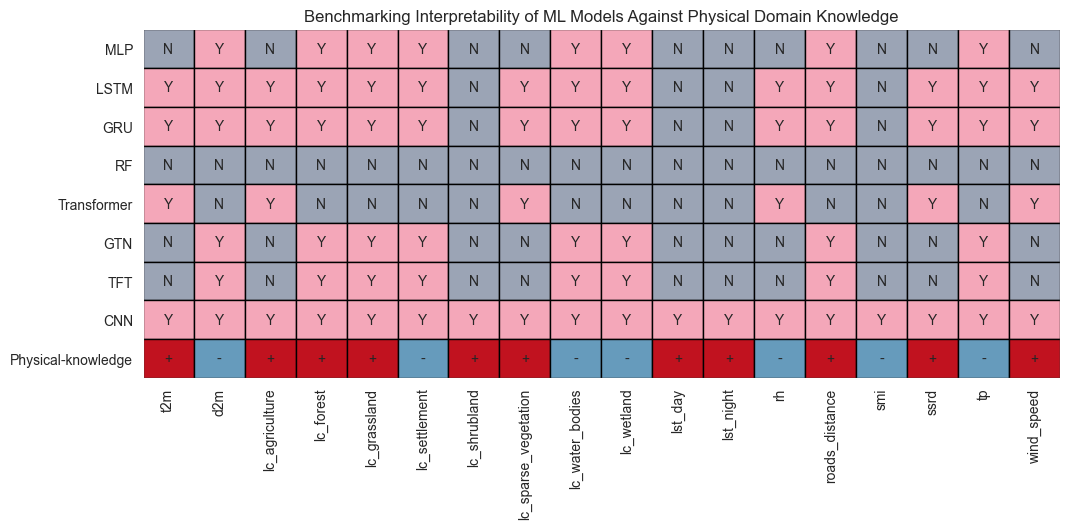

In [18]:
fig, ax = plt.subplots(figsize=(len(df_plot.columns)*0.6, len(df_plot)*0.6))

# Farbe pro Zelle
for (i, j), val in np.ndenumerate(df_plot.values):
    ax.add_patch(plt.Rectangle((j, i), 1, 1, color=get_color(val), ec='black'))
    ax.text(j + 0.5, i + 0.5, val, ha='center', va='center', fontsize=10)

ax.set_xlim(0, len(df_plot.columns))
ax.set_ylim(0, len(df_plot.index))
ax.set_xticks(np.arange(len(df_plot.columns)) + 0.5)
ax.set_yticks(np.arange(len(df_plot.index)) + 0.5)
ax.set_xticklabels(df_plot.columns, rotation=90)
ax.set_yticklabels(df_plot.index)
ax.invert_yaxis()
ax.set_title("Benchmarking Interpretability of ML Models Against Physical Domain Knowledge")
plt.tight_layout()
plt.show()